In [11]:
# import scqubits.testing as sctest
# sctest.run()

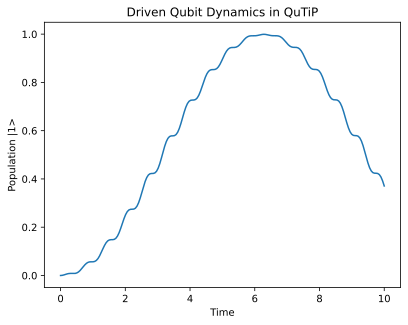

In [ ]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# Parameters
w_q = 5.0      # Qubit frequency
A = 0.5        # Drive amplitude
w_d = 5.0      # Drive frequency (resonant)
tlist = np.linspace(0, 10, 200)
psi0 = qt.basis(2, 0)  # Initial state |0>

def drive_coeff(t, args):
    return A * np.cos(args['w_d'] * t)

# Hamiltonian
H = [w_q/2 * qt.sigmaz(), [qt.sigmax(), drive_coeff]]
args = {'w_d': w_d}

# Time evolution
result = qt.mesolve(H, psi0, tlist, [], [], args=args)

# Plot population of |1>
pop1 = [np.abs(state.overlap(qt.basis(2,1)))**2 for state in result.states]
plt.plot(tlist, pop1)
plt.xlabel('Time')
plt.ylabel('Population |1>')
plt.title('Driven Qubit Dynamics in QuTiP')
plt.show()


In [13]:
psi0

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]

In [16]:
from qutip import Qobj

psi02 = Qobj([[1], [0]])

psi02

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]

In [20]:
psi03 = qt.sigmax()	

psi03

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [18]:
if (psi02 == psi0):
    print("Equal")

Equal


In [25]:
psi0.dag() * psi03

Quantum object: dims=[[1], [2]], shape=(1, 2), type='bra', dtype=Dense
Qobj data =
[[0. 1.]]